In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from math import sqrt
from sklearn.linear_model import LassoCV, LassoLarsCV, Lasso, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
from google.colab import drive, files 
drive.mount('/content.drive')

Mounted at /content.drive


In [3]:
!ls '/content.drive/MyDrive/UIUC/MLTP/Classification/DATA'

 final_test.csv   final_train.csv  'Urban land cover'


In [4]:
train = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/final_train.csv')
test = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/final_test.csv')
dropp = ['Unnamed: 0']
train = train.drop(dropp,axis=1)
test = test.drop(dropp,axis=1)

In [5]:
y_train = train['class']
xdrop = train['class']
x_train = train.iloc[:,0:147]
x_train

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,0.084639,0.022198,0.331010,0.935481,0.105405,0.126543,0.821811,0.948658,0.958537,0.532585,0.501899,0.482040,0.078135,0.513158,0.833333,0.623762,0.583333,0.734694,0.373333,0.076923,0.442439,0.086387,0.008382,0.331325,0.913406,0.062745,0.076110,0.803303,0.929434,0.941129,0.465703,0.526282,0.491255,0.045188,0.493976,0.821429,0.301325,0.671958,0.680851,0.356164,...,0.168126,0.912669,0.018987,0.029197,0.816789,0.929677,0.941030,0.371188,0.425521,0.395714,0.019786,0.274194,0.824324,0.000000,0.682464,0.677419,0.394366,0.000000,1.000000,0.049699,0.000000,0.168126,0.912669,0.018987,0.029197,0.816789,0.929677,0.941030,0.371188,0.425521,0.395714,0.019786,0.274194,0.824324,0.000000,0.682464,0.677419,0.394366,0.000000,1.000000
1,0.426332,0.063305,0.536585,0.861931,0.394595,0.447531,0.728752,0.892742,0.896248,0.069847,0.109553,0.129792,0.034143,0.473684,0.525641,0.663366,0.553571,0.683673,0.346667,0.260073,0.362991,0.526178,0.149065,0.430723,0.826371,0.245098,0.524313,0.699292,0.862105,0.862999,0.081536,0.146506,0.152883,0.089019,0.650602,0.583333,0.589404,0.544974,0.819149,0.328767,...,0.262697,0.837256,0.130098,0.353102,0.730144,0.867965,0.870611,0.283386,0.330299,0.326250,0.024733,0.741935,0.418919,0.698361,0.545024,0.795699,0.380282,0.273640,0.320902,0.537651,0.227094,0.262697,0.837256,0.130098,0.353102,0.730144,0.867965,0.870611,0.283386,0.330299,0.326250,0.024733,0.741935,0.418919,0.698361,0.545024,0.795699,0.380282,0.273640,0.320902
2,0.351097,0.070156,0.505226,0.939344,0.289189,0.354938,0.815412,0.959886,0.964681,0.057063,0.049956,0.084817,0.009192,0.565789,0.717949,0.610561,0.750000,0.173469,0.373333,0.238095,0.253822,0.345550,0.137073,0.445783,0.939443,0.182353,0.315011,0.824115,0.960614,0.963479,0.011001,0.075575,0.073418,0.053773,0.481928,0.690476,0.374172,0.640212,0.797872,0.356164,...,0.176883,0.891801,0.057665,0.089416,0.804804,0.910012,0.912527,0.155976,0.207947,0.206607,0.023546,0.693548,0.675676,0.311475,0.687204,0.795699,0.408451,0.082578,0.218268,0.140060,0.134485,0.176883,0.891801,0.057665,0.089416,0.804804,0.910012,0.912527,0.155976,0.207947,0.206607,0.023546,0.693548,0.675676,0.311475,0.687204,0.795699,0.408451,0.082578,0.218268
3,0.445141,0.106605,0.439024,0.930748,0.402703,0.515432,0.806417,0.955585,0.953096,0.044590,0.068361,0.082704,0.099146,0.539474,0.666667,0.640264,0.529762,0.826531,0.360000,0.373626,0.343501,0.565445,0.512830,0.680723,0.934883,0.486275,0.509514,0.807173,0.965629,0.961957,0.075712,0.124974,0.127618,0.057388,0.650602,0.547619,0.549669,0.486772,0.829787,0.342466,...,0.218914,0.909999,0.071027,0.162409,0.798271,0.942111,0.938395,0.126884,0.169788,0.169464,0.046300,0.790323,0.675676,0.377049,0.535545,0.913978,0.380282,0.181671,0.227301,0.212349,0.309741,0.218914,0.909999,0.071027,0.162409,0.798271,0.942111,0.938395,0.126884,0.169788,0.169464,0.046300,0.790323,0.675676,0.377049,0.535545,0.913978,0.380282,0.181671,0.227301
4,0.360502,0.255961,0.595819,0.751002,0.345946,0.938272,0.627347,0.784806,0.787430,0.222326,0.165936,0.212798,0.739330,0.815789,0.474359,0.996700,0.005952,0.989796,0.333333,0.897436,0.158808,0.301047,0.117602,0.515060,0.746641,0.250980,0.642706,0.624115,0.785021,0.787151,0.116911,0.115474,0.136903,0.508812,0.746988,0.511905,0.655629,0.121693,0.989362,0.315068,...,0

In [6]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([2, 3, 3, 3, 3, 8, 2, 2, 1, 8, 1, 0, 1, 4, 6, 1, 8, 7, 1, 6, 5, 6,
       3, 8, 4, 3, 4, 1, 1, 1, 0, 6, 1, 4, 8, 1, 0, 8, 8, 3, 7, 8, 1, 1,
       1, 4, 4, 6, 7, 7, 6, 8, 2, 2, 0, 5, 1, 8, 4, 4, 2, 2, 5, 2, 7, 4,
       1, 3, 7, 7, 3, 1, 5, 5, 5, 6, 1, 4, 6, 1, 5, 5, 1, 3, 1, 6, 1, 7,
       0, 4, 4, 7, 3, 7, 7, 4, 5, 2, 6, 4, 4, 0, 4, 2, 4, 0, 4, 1, 3, 4,
       0, 4, 4, 5, 3, 8, 4, 3, 3, 2, 2, 4, 6, 5, 8, 6, 4, 5, 3, 4, 3, 0,
       0, 3, 0, 7, 6, 5, 5, 5, 2, 1, 3, 0, 3, 0, 1, 6, 6, 8, 4, 2, 8, 6,
       3, 1, 7, 8, 0, 3, 4, 8, 8, 2, 7, 4, 4, 3])

# Ridge Regression

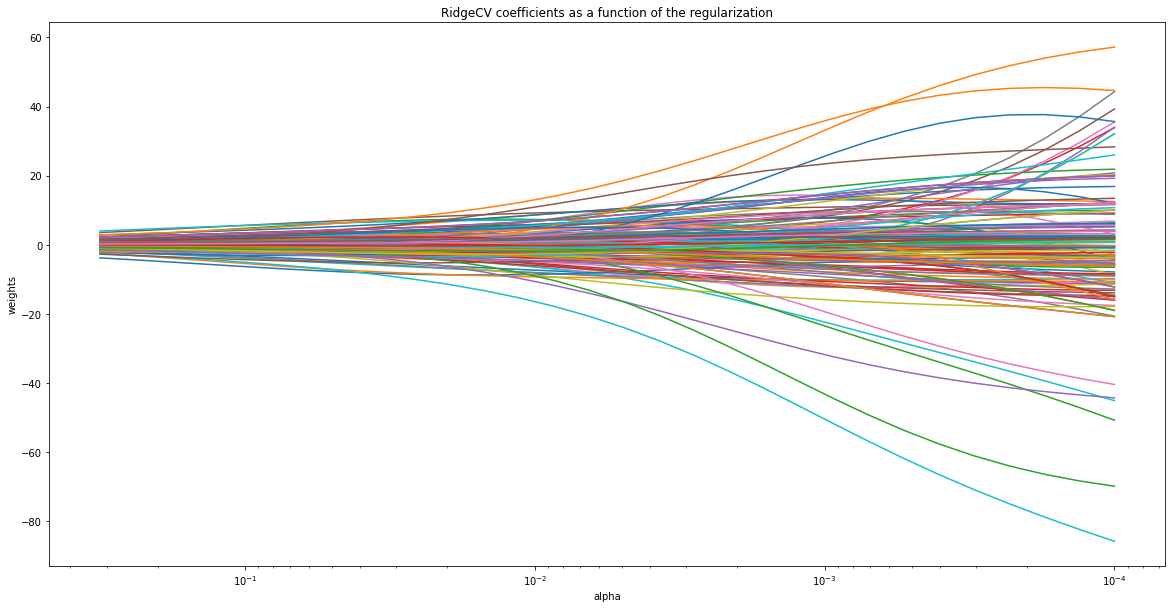

In [7]:
alphas = np.logspace(-4, -0.5, 30)
coefs = []
for a in alphas:
    ridge = RidgeCV(alphas=[a], fit_intercept=False, cv = StratifiedKFold(n_splits=4))
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
plt.figure(figsize=(20,10))

ax = plt.gca()
# fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('RidgeCV coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [8]:
alphas = np.logspace(-4, -0.5, 30)

coef = []
for a in alphas:
    model = Ridge(alpha=a).fit(x_train,y_train) 
    score = model.score(x_train, y_train)
    pred_y = model.predict(x_train)
    mse = metrics.mean_squared_error(y_train, pred_y) 
    coef.append(model.coef_)
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.000100, R2:0.880, MSE:0.72, RMSE:0.85
Alpha:0.000132, R2:0.880, MSE:0.72, RMSE:0.85
Alpha:0.000174, R2:0.879, MSE:0.72, RMSE:0.85
Alpha:0.000230, R2:0.879, MSE:0.72, RMSE:0.85
Alpha:0.000304, R2:0.878, MSE:0.73, RMSE:0.85
Alpha:0.000401, R2:0.877, MSE:0.74, RMSE:0.86
Alpha:0.000530, R2:0.876, MSE:0.74, RMSE:0.86
Alpha:0.000700, R2:0.874, MSE:0.76, RMSE:0.87
Alpha:0.000924, R2:0.871, MSE:0.77, RMSE:0.88
Alpha:0.001220, R2:0.868, MSE:0.79, RMSE:0.89
Alpha:0.001610, R2:0.864, MSE:0.82, RMSE:0.90
Alpha:0.002126, R2:0.859, MSE:0.84, RMSE:0.92
Alpha:0.002807, R2:0.854, MSE:0.87, RMSE:0.93
Alpha:0.003707, R2:0.848, MSE:0.91, RMSE:0.95
Alpha:0.004894, R2:0.843, MSE:0.94, RMSE:0.97
Alpha:0.006462, R2:0.837, MSE:0.98, RMSE:0.99
Alpha:0.008532, R2:0.831, MSE:1.01, RMSE:1.01
Alpha:0.011265, R2:0.824, MSE:1.05, RMSE:1.02
Alpha:0.014874, R2:0.818, MSE:1.09, RMSE:1.04
Alpha:0.019638, R2:0.812, MSE:1.13, RMSE:1.06
Alpha:0.025929, R2:0.805, MSE:1.16, RMSE:1.08
Alpha:0.034236, R2:0.798, MSE:1.21

In [9]:
ridge_cv=RidgeCV(alphas=alphas, cv = StratifiedKFold(n_splits=4))
ridge_mod = ridge_cv.fit(x_train,y_train)
print(ridge_mod.alpha_)

0.31622776601683794


In [10]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient_Estimate'] = pd.Series(ridge_mod.coef_)

In [11]:
ridge_coefficient['Coefficient_Estimate'] = ridge_coefficient['Coefficient_Estimate'].abs()
ridge_coefficient = ridge_coefficient.sort_values(by = 'Coefficient_Estimate', ascending=False)
ridge_coefficient


,Columns,Coefficient_Estimate
39,NDVI_40,3.948435
40,BordLngth_40,3.774361
35,Rect_40,3.618465
60,NDVI_60,2.906973
71,Mean_NIR_80,2.822019
...,...,...
115,SD_R_120,0.052873
13,GLCM1,0.052835
122,Assym_120,0.037187
143,Assym_140,0.037187


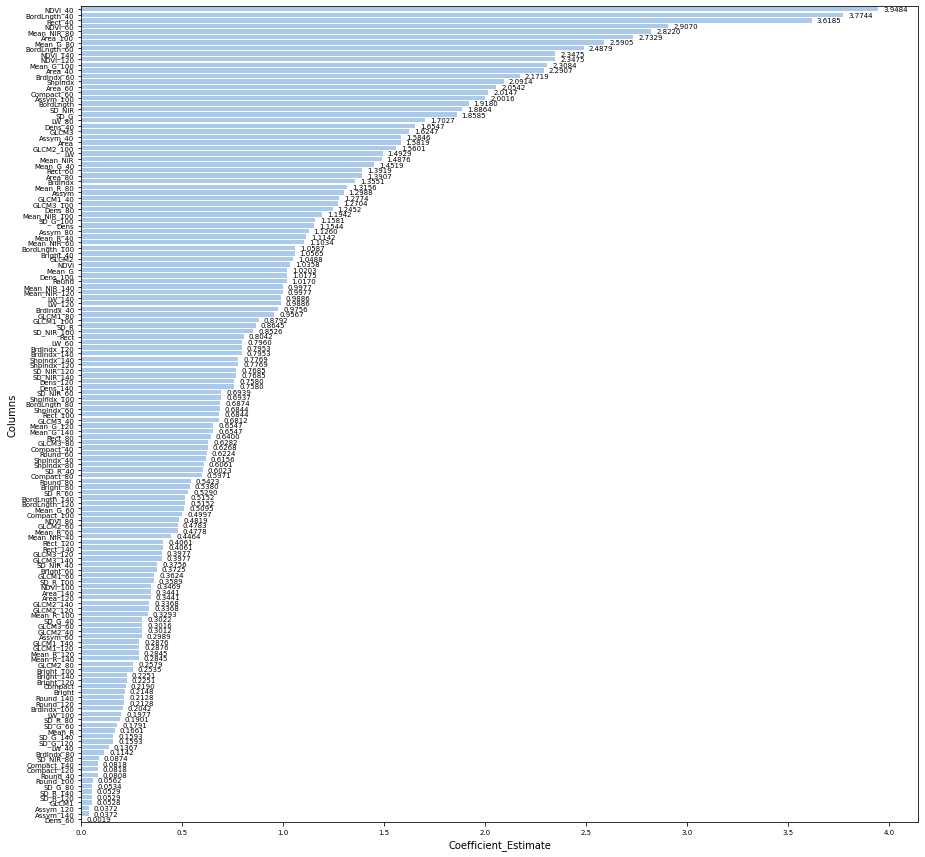

In [12]:
# fig = px.bar(ridge_coefficient, x="Coefficient_Estimate", y="Columns", orientation='h')
# fig.update_yaxes(tickfont=dict(color='crimson', size = 5))
# fig.show()
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
b = sns.barplot(x="Coefficient_Estimate", y="Columns", data=ridge_coefficient, color="b")
b.tick_params(labelsize=7)
for p in b.patches:
    b.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 7)

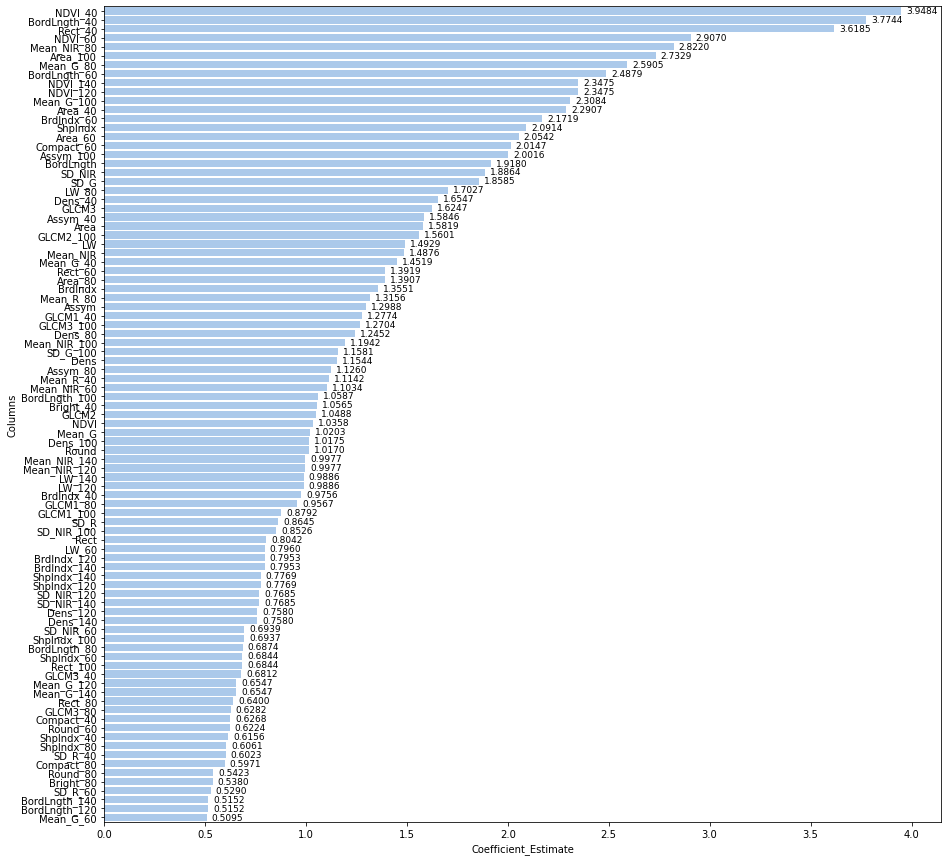

In [13]:
ridge_filter = ridge_coefficient.loc[(ridge_coefficient['Coefficient_Estimate'] >= 0.5)]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
b = sns.barplot(x="Coefficient_Estimate", y="Columns", data=ridge_filter, color="b")
b.tick_params(labelsize=10)
for p in b.patches:
    b.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 9)

In [14]:
np.unique(ridge_filter['Columns'])

array(['Area', 'Area_100', 'Area_40', 'Area_60', 'Area_80', 'Assym',
       'Assym_100', 'Assym_40', 'Assym_80', 'BordLngth', 'BordLngth_100',
       'BordLngth_120', 'BordLngth_140', 'BordLngth_40', 'BordLngth_60',
       'BordLngth_80', 'BrdIndx', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'Bright_40', 'Bright_80', 'Compact_40',
       'Compact_60', 'Compact_80', 'Dens', 'Dens_100', 'Dens_120',
       'Dens_140', 'Dens_40', 'Dens_80', 'GLCM1_100', 'GLCM1_40',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM3', 'GLCM3_100', 'GLCM3_40',
       'GLCM3_80', 'LW', 'LW_120', 'LW_140', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_100', 'Mean_G_120', 'Mean_G_140', 'Mean_G_40', 'Mean_G_60',
       'Mean_G_80', 'Mean_NIR', 'Mean_NIR_100', 'Mean_NIR_120',
       'Mean_NIR_140', 'Mean_NIR_60', 'Mean_NIR_80', 'Mean_R_40',
       'Mean_R_80', 'NDVI', 'NDVI_120', 'NDVI_140', 'NDVI_40', 'NDVI_60',
       'Rect', 'Rect_100', 'Rect_40', 'Rect_60', 'Rect_80', 'Round',
       'Round_60

In [16]:
ridge_filter2 = ridge_coefficient.loc[(ridge_coefficient['Coefficient_Estimate'] >= 0.1)]
np.unique(ridge_filter2['Columns'])

array(['Area', 'Area_100', 'Area_120', 'Area_140', 'Area_40', 'Area_60',
       'Area_80', 'Assym', 'Assym_100', 'Assym_40', 'Assym_60',
       'Assym_80', 'BordLngth', 'BordLngth_100', 'BordLngth_120',
       'BordLngth_140', 'BordLngth_40', 'BordLngth_60', 'BordLngth_80',
       'BrdIndx', 'BrdIndx_100', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'BrdIndx_80', 'Bright', 'Bright_100',
       'Bright_120', 'Bright_140', 'Bright_40', 'Bright_60', 'Bright_80',
       'Compact', 'Compact_100', 'Compact_40', 'Compact_60', 'Compact_80',
       'Dens', 'Dens_100', 'Dens_120', 'Dens_140', 'Dens_40', 'Dens_80',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM2_120', 'GLCM2_140',
       'GLCM2_40', 'GLCM2_60', 'GLCM2_80', 'GLCM3', 'GLCM3_100',
       'GLCM3_120', 'GLCM3_140', 'GLCM3_40', 'GLCM3_60', 'GLCM3_80', 'LW',
       'LW_100', 'LW_120', 'LW_140', 'LW_40', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_1

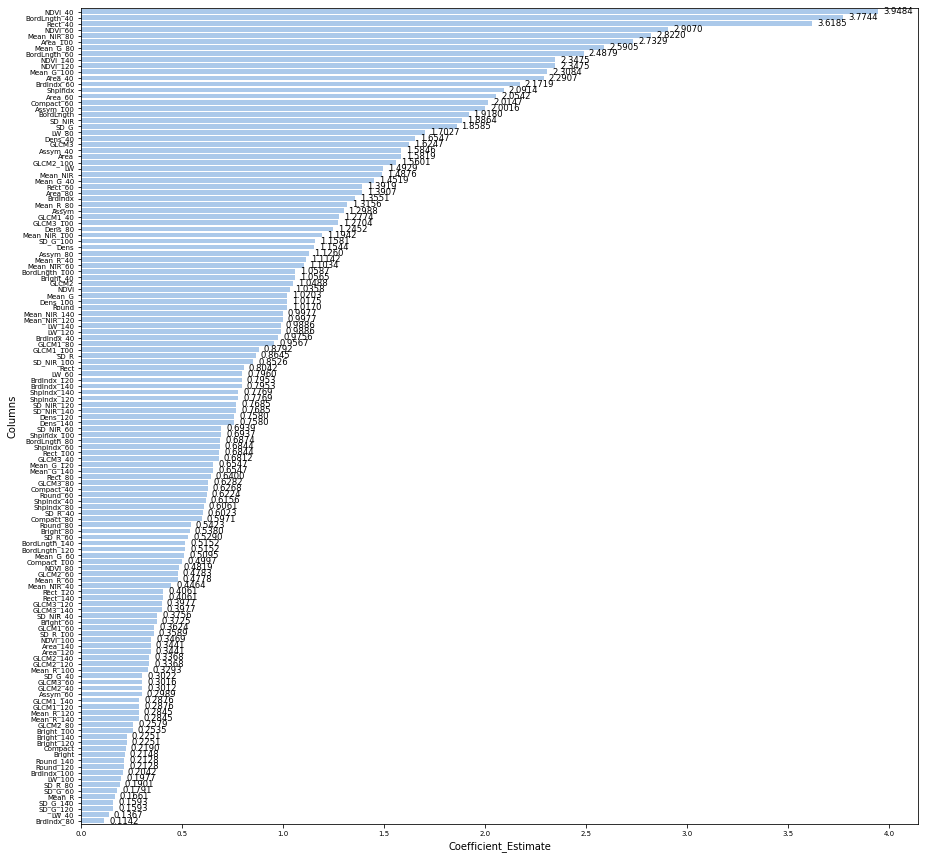

In [19]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
b = sns.barplot(x="Coefficient_Estimate", y="Columns", data=ridge_filter2, color="b")
b.tick_params(labelsize=7)
for p in b.patches:
    b.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 8.5)

# Lasso 

(0.0001, 0.31622776601683794)

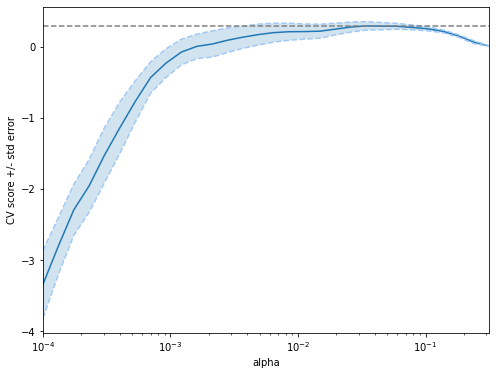

In [ ]:
lasso = Lasso(random_state=0, max_iter=1000000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]

n_folds = 4
lasso_search = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
lasso_search.fit(x_train, y_train)

scores = lasso_search.cv_results_['mean_test_score']
scores_std = lasso_search.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)


# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

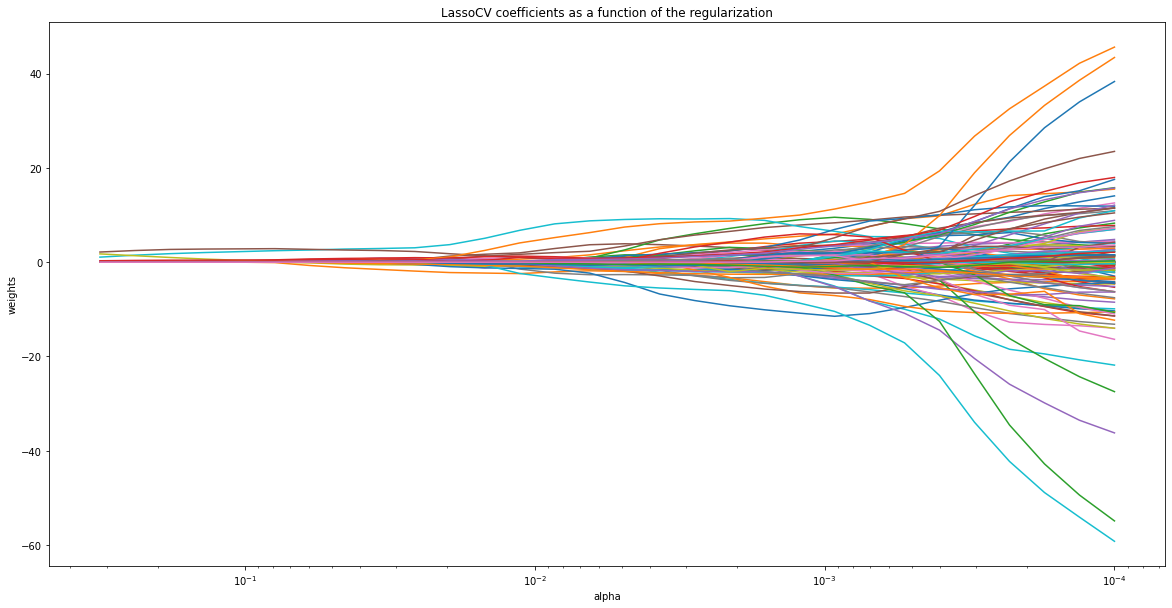

In [ ]:
alphas = np.logspace(-4, -0.5, 30)
lasso_coefs = []
for a in alphas:
    lasso = LassoCV(alphas=[a], fit_intercept=False, cv = StratifiedKFold(n_splits=4), max_iter=1000000)
    lasso.fit(x_train, y_train)
    lasso_coefs.append(lasso.coef_)

# #############################################################################
# Display results
plt.figure(figsize=(20,10))

ax = plt.gca()
# fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LassoCV coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
alphas = np.logspace(-4, -0.5, 30)
coef = []
for a in alphas:
    model = Lasso(alpha=a, max_iter = 1000000).fit(x_train,y_train) 
    score = model.score(x_train, y_train)
    pred_y = model.predict(x_train)
    mse = metrics.mean_squared_error(y_train, pred_y) 
    coef.append(model.coef_)
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.000100, R2:0.871, MSE:0.77, RMSE:0.88
Alpha:0.000132, R2:0.868, MSE:0.79, RMSE:0.89
Alpha:0.000174, R2:0.861, MSE:0.83, RMSE:0.91
Alpha:0.000230, R2:0.853, MSE:0.88, RMSE:0.94
Alpha:0.000304, R2:0.842, MSE:0.95, RMSE:0.97
Alpha:0.000401, R2:0.825, MSE:1.05, RMSE:1.02
Alpha:0.000530, R2:0.813, MSE:1.12, RMSE:1.06
Alpha:0.000700, R2:0.801, MSE:1.19, RMSE:1.09
Alpha:0.000924, R2:0.788, MSE:1.27, RMSE:1.13
Alpha:0.001220, R2:0.777, MSE:1.33, RMSE:1.16
Alpha:0.001610, R2:0.762, MSE:1.42, RMSE:1.19
Alpha:0.002126, R2:0.746, MSE:1.52, RMSE:1.23
Alpha:0.002807, R2:0.725, MSE:1.64, RMSE:1.28
Alpha:0.003707, R2:0.699, MSE:1.80, RMSE:1.34
Alpha:0.004894, R2:0.669, MSE:1.98, RMSE:1.41
Alpha:0.006462, R2:0.636, MSE:2.18, RMSE:1.48
Alpha:0.008532, R2:0.604, MSE:2.37, RMSE:1.54
Alpha:0.011265, R2:0.573, MSE:2.55, RMSE:1.60
Alpha:0.014874, R2:0.535, MSE:2.78, RMSE:1.67
Alpha:0.019638, R2:0.490, MSE:3.05, RMSE:1.75
Alpha:0.025929, R2:0.453, MSE:3.27, RMSE:1.81
Alpha:0.034236, R2:0.430, MSE:3.41

In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv = StratifiedKFold(n_splits=4), max_iter=1000000)
lasso_mod = lasso_cv.fit(x_train,y_train)
print(lasso_mod.alpha_)

0.03423597957607583


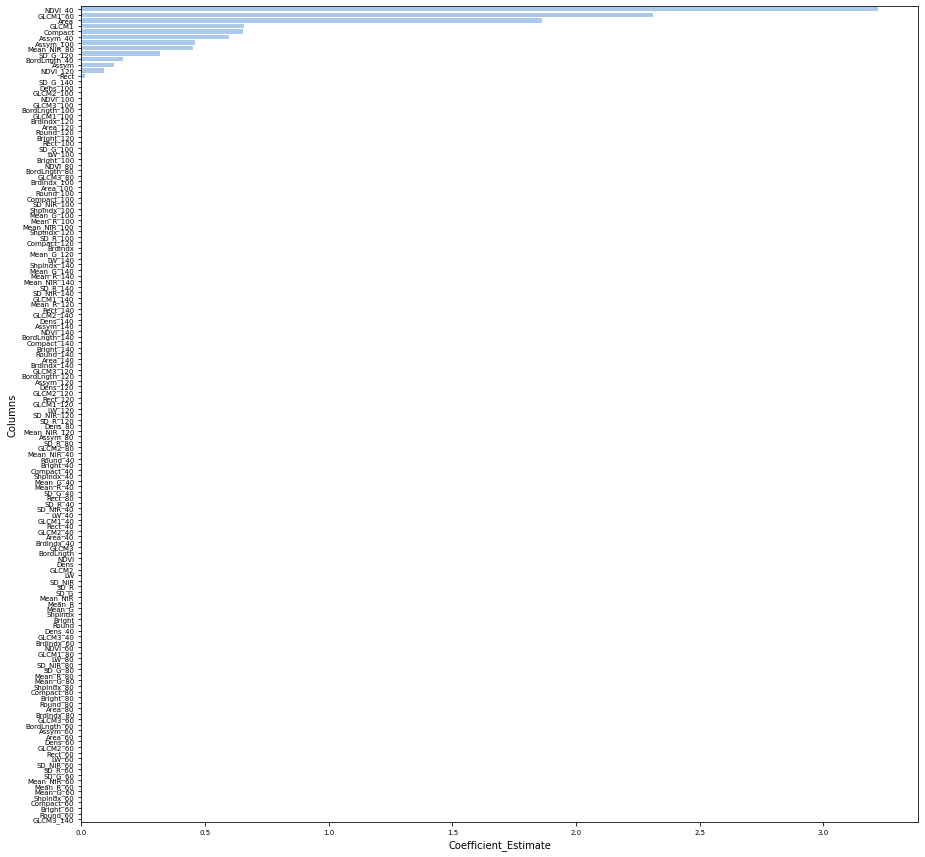

In [ ]:
lasso_coefficient = pd.DataFrame() 
lasso_coefficient["Columns"]= x_train.columns 
lasso_coefficient['Coefficient_Estimate'] = pd.Series(lasso_mod.coef_)
lasso_coefficient['Coefficient_Estimate'] = lasso_coefficient['Coefficient_Estimate'].abs()
lasso_coefficient = lasso_coefficient.sort_values(by = 'Coefficient_Estimate', ascending=False)
lasso_coefficient

f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
b = sns.barplot(x="Coefficient_Estimate", y="Columns", data=lasso_coefficient, color="b")
b.tick_params(labelsize=7)
# for p in b.patches:
#     b.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#             xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 9)

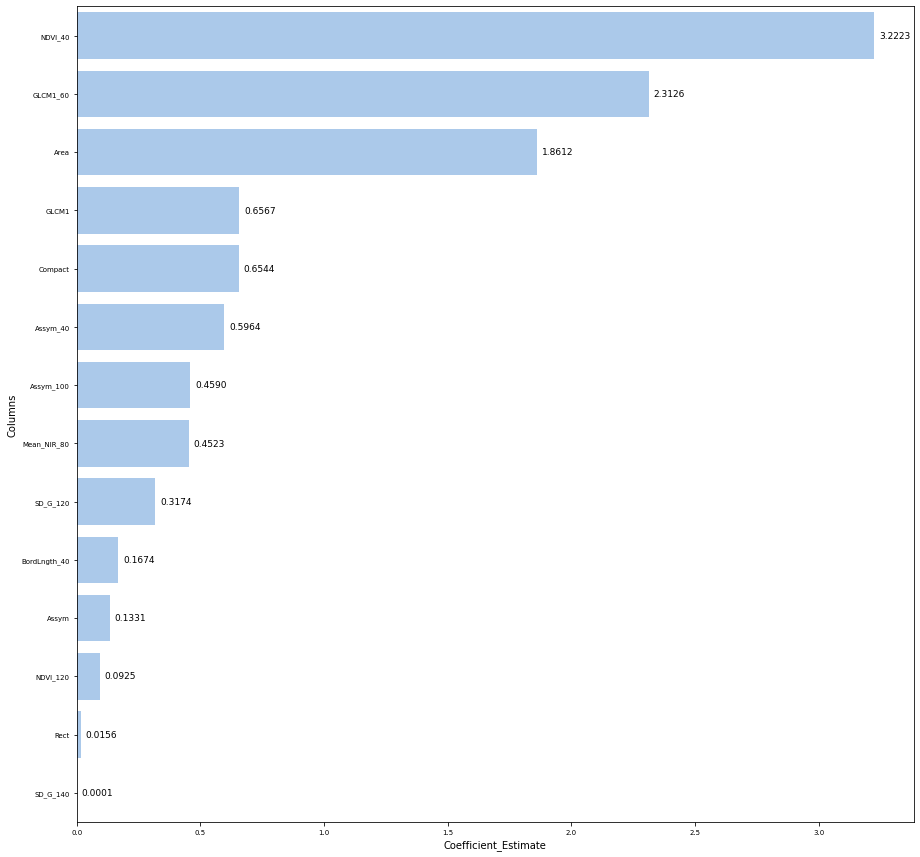

In [ ]:
lasso_filter = lasso_coefficient.loc[(lasso_coefficient['Coefficient_Estimate'] != 0)]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
b = sns.barplot(x="Coefficient_Estimate", y="Columns", data=lasso_filter, color="b")
b.tick_params(labelsize=7)
for p in b.patches:
    b.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 9)

In [ ]:
np.unique(lasso_filter['Columns'])

array(['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth_40',
       'Compact', 'GLCM1', 'GLCM1_60', 'Mean_NIR_80', 'NDVI_120',
       'NDVI_40', 'Rect', 'SD_G_120', 'SD_G_140'], dtype=object)

In [ ]:
print(lasso_filter.shape)

(14, 2)


# Elastic Net

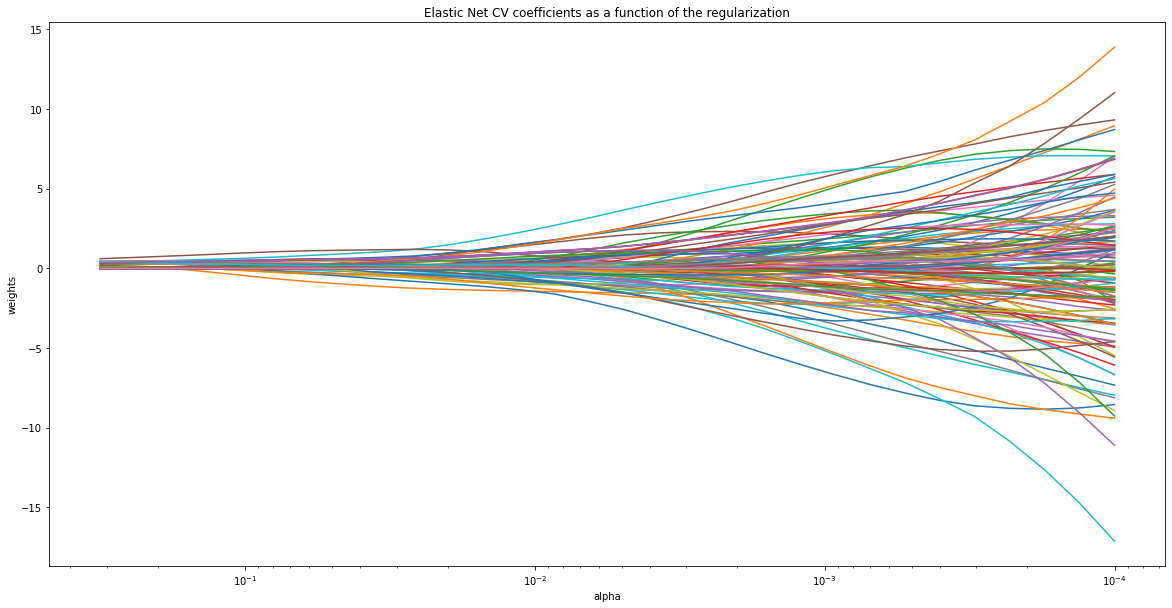

In [ ]:
alphas = np.logspace(-4, -0.5, 30)
ela_coefs = []
for a in alphas:
    ela = ElasticNetCV(alphas=[a], fit_intercept=False, cv = StratifiedKFold(n_splits=4), max_iter=1000000)
    ela.fit(x_train, y_train)
    ela_coefs.append(ela.coef_)

# #############################################################################
# Display results
plt.figure(figsize=(20,10))

ax = plt.gca()
# fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(alphas, ela_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Elastic Net CV coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
alphas = np.logspace(-4, -0.5, 30)

coef = []
for a in alphas:
    model = ElasticNet(alpha=a, max_iter=1000000).fit(x_train,y_train) 
    score = model.score(x_train, y_train)
    pred_y = model.predict(x_train)
    mse = metrics.mean_squared_error(y_train, pred_y) 
    coef.append(model.coef_)
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.000100, R2:0.828, MSE:1.03, RMSE:1.02
Alpha:0.000132, R2:0.821, MSE:1.07, RMSE:1.03
Alpha:0.000174, R2:0.814, MSE:1.11, RMSE:1.05
Alpha:0.000230, R2:0.807, MSE:1.16, RMSE:1.08
Alpha:0.000304, R2:0.799, MSE:1.20, RMSE:1.10
Alpha:0.000401, R2:0.791, MSE:1.25, RMSE:1.12
Alpha:0.000530, R2:0.782, MSE:1.30, RMSE:1.14
Alpha:0.000700, R2:0.772, MSE:1.36, RMSE:1.17
Alpha:0.000924, R2:0.760, MSE:1.43, RMSE:1.20
Alpha:0.001220, R2:0.746, MSE:1.52, RMSE:1.23
Alpha:0.001610, R2:0.729, MSE:1.62, RMSE:1.27
Alpha:0.002126, R2:0.710, MSE:1.74, RMSE:1.32
Alpha:0.002807, R2:0.689, MSE:1.86, RMSE:1.36
Alpha:0.003707, R2:0.666, MSE:1.99, RMSE:1.41
Alpha:0.004894, R2:0.642, MSE:2.14, RMSE:1.46
Alpha:0.006462, R2:0.617, MSE:2.29, RMSE:1.51
Alpha:0.008532, R2:0.592, MSE:2.44, RMSE:1.56
Alpha:0.011265, R2:0.568, MSE:2.59, RMSE:1.61
Alpha:0.014874, R2:0.541, MSE:2.75, RMSE:1.66
Alpha:0.019638, R2:0.512, MSE:2.92, RMSE:1.71
Alpha:0.025929, R2:0.485, MSE:3.08, RMSE:1.75
Alpha:0.034236, R2:0.461, MSE:3.22

In [ ]:
enet_cv = ElasticNetCV(alphas=alphas, cv = StratifiedKFold(n_splits=4), max_iter=1000000)
enet_mod = enet_cv.fit(x_train,y_train)
print(enet_mod.alpha_)

0.04520353656360245


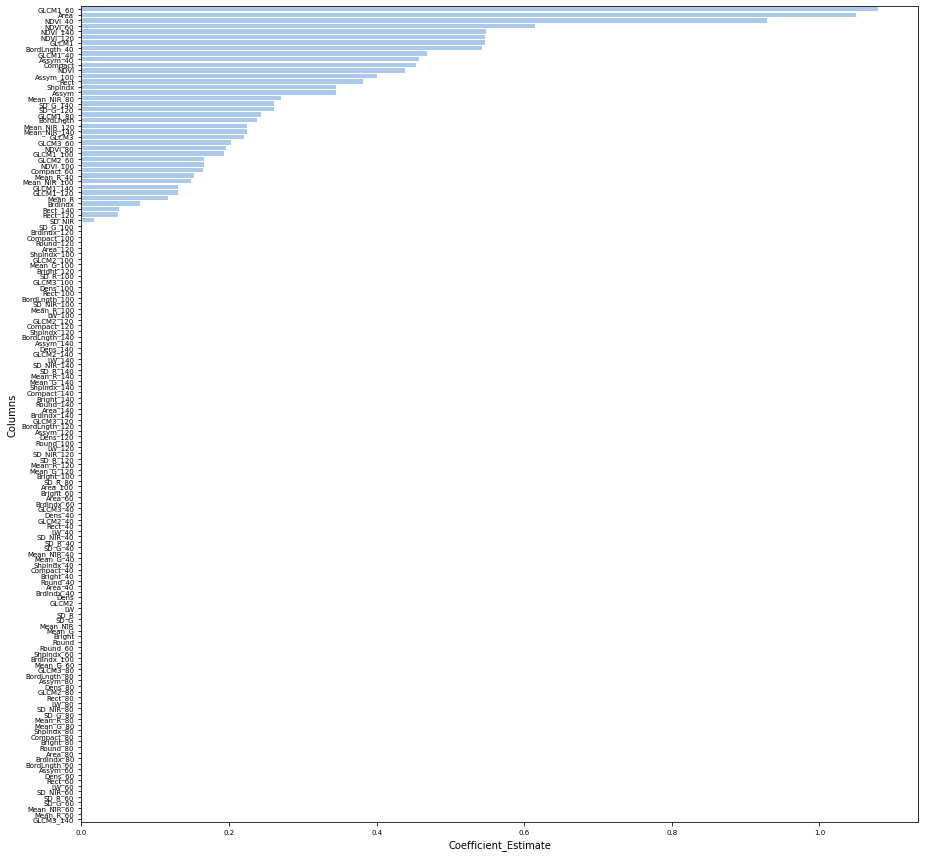

In [ ]:
enet_coefficient = pd.DataFrame() 
enet_coefficient["Columns"]= x_train.columns 
enet_coefficient['Coefficient_Estimate'] = pd.Series(enet_mod.coef_)
enet_coefficient['Coefficient_Estimate'] = enet_coefficient['Coefficient_Estimate'].abs()
enet_coefficient = enet_coefficient.sort_values(by = 'Coefficient_Estimate', ascending=False)
enet_coefficient

f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
b = sns.barplot(x="Coefficient_Estimate", y="Columns", data=enet_coefficient, color="b")
b.tick_params(labelsize=7)
# for p in b.patches:
#     b.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#             xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 9)

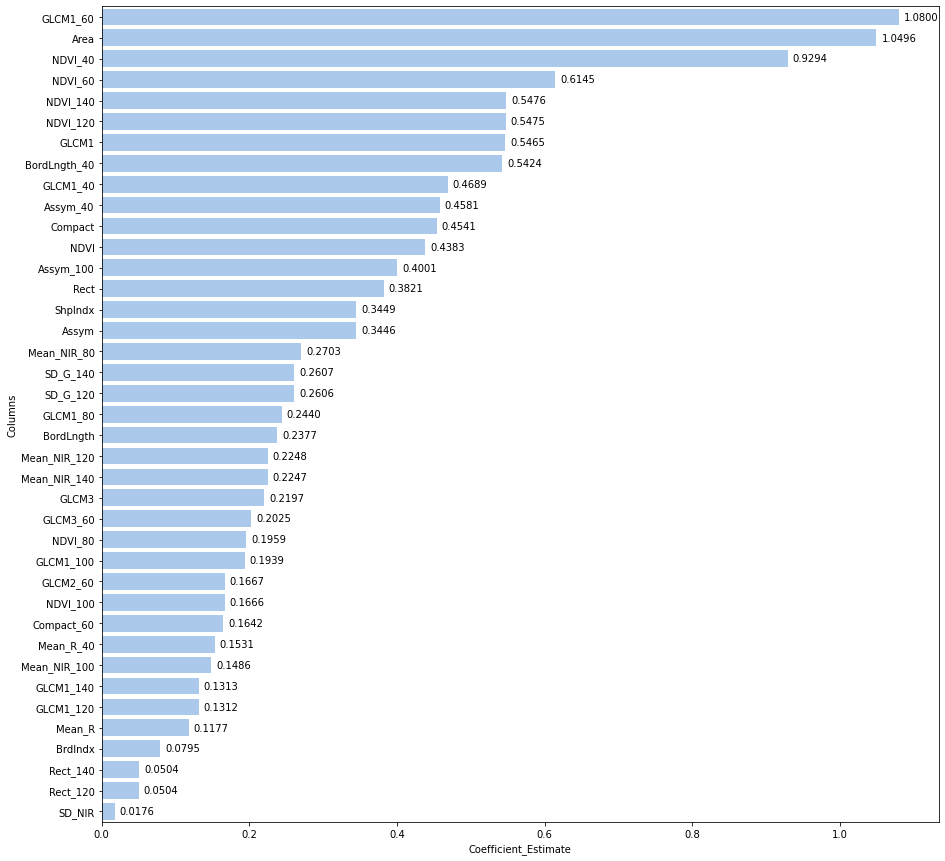

In [ ]:
enet_filter = enet_coefficient.loc[(enet_coefficient['Coefficient_Estimate'] != 0)]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
b = sns.barplot(x="Coefficient_Estimate", y="Columns", data=enet_filter, color="b")
b.tick_params(labelsize=10)
for p in b.patches:
    b.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize = 10)

In [ ]:
np.unique(enet_filter['Columns'])

array(['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth',
       'BordLngth_40', 'BrdIndx', 'Compact', 'Compact_60', 'GLCM1',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2_60', 'GLCM3', 'GLCM3_60', 'Mean_NIR_100',
       'Mean_NIR_120', 'Mean_NIR_140', 'Mean_NIR_80', 'Mean_R',
       'Mean_R_40', 'NDVI', 'NDVI_100', 'NDVI_120', 'NDVI_140', 'NDVI_40',
       'NDVI_60', 'NDVI_80', 'Rect', 'Rect_120', 'Rect_140', 'SD_G_120',
       'SD_G_140', 'SD_NIR', 'ShpIndx'], dtype=object)

In [ ]:
print(enet_filter.shape)

(39, 2)
